In [142]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Considération mécanique

On peut tirer sur un matériau élastique... jusqu'à ce qu'il case, ou bien se déforme plastiquement. La limite élastique du matériau est alors atteinte (yield strength, yield stress ). L'énergie élastique maximale qu'il est possible de stocker en déformant un matériau est donc dépendante de cette valeur. 

https://en.wikipedia.org/wiki/Yield_(engineering)

https://fr.wikipedia.org/wiki/Mat%C3%A9riau_pour_ressort  
https://en.wikipedia.org/wiki/Spring_steel

In [610]:
data_mat = {}

# Natural Rubber
# https://books.google.fr/books?id=S-TKBQAAQBAJ&lpg=PA104&ots=WJaYB6ndIT&dq=butyl%20rubber%20young%20modulus&hl=fr&pg=PA243#v=snippet&q=natural%20young&f=false
data_mat['Caoutchouc naturel'] = { 'density': 0.65, 'EYoung': 1.5e6, 'yield_stress' : 20e6 }

#  caoutchoucs butyle - https://fr.wikipedia.org/wiki/Polyisobutyl%C3%A8ne
# http://www.matweb.com/search/DataSheet.aspx?MatGUID=754a0c3d7c194965a0b369792855bfe4
# http://www.matweb.com/search/DataSheet.aspx?MatGUID=0585fb3433674d2981bb6de760d6ef1c

# young : https://books.google.fr/books?id=S-TKBQAAQBAJ&lpg=PA104&ots=WJaYB6ndIT&dq=butyl%20rubber%20young%20modulus&hl=fr&pg=PA104#v=onepage&q=butyl%20rubber%20young%20modulus&f=false
data_mat['Caoutchouc butyl'] = { 'density': 1.2, 'EYoung': 7e6, 'yield_stress' : 8.6e6 }

# Piano wire, ASTM A228
# http://www.matweb.com/search/DataSheet.aspx?MatGUID=4bcaab41d4eb43b3824d9de31c2c6849&ckck=1
data_mat['Corde à piano (1mm)'] = { 'density': 7.8, 'EYoung': 210e9, 'yield_stress' : 2200e6 }
data_mat['Corde à piano (6mm)'] = { 'density': 7.8, 'EYoung': 210e9, 'yield_stress' : 1500e6 }


# https://www.modelpascher.com/store/index.php/materiaux/corde-a-piano/corde-a-piano-7mm.html

# Acier ressort ??
# http://www.matweb.com/search/DataSheet.aspx?MatGUID=cc3875168cec497aa05d27e8a250bd28
data_mat['Acier ressort'] = { 'density': 7.8, 'EYoung': 160e9, 'yield_stress' : 1200e6 }

# Steel, ASTM 36
# http://www.matweb.com/search/DataSheet.aspx?MatGUID=d1844977c5c8440cb9a3a967f8909c3a
data_mat['Acier struct.'] = { 'density': 7.8, 'EYoung': 200e9, 'yield_stress' : 200e6 }

# Ti6Al4V Titanium Alloy
# http://www.matweb.com/search/DataSheet.aspx?MatGUID=237df255c8324fe6a06dc004e86d86b6
data_mat['Alliage de Titane'] = { 'density': 4.43, 'EYoung': 120e9, 'yield_stress' : 1020e6 }



In [631]:
masse_limite = 0.2 # kg
U_max = lambda mat: 1/2 * mat['yield_stress']**2 / mat['EYoung'] * masse_limite/ (1e3*mat['density'])

masse_cycliste = 90 # kg
deltaV_max = lambda mat: np.sqrt( 2*U_max( mat )/masse_cycliste ) *1000/3600 # km/h

deltaV_cible = 15 * 1000/3600 # m/s
mRessort_max = lambda mat: (1e3*mat['density'])*mat['EYoung'] / mat['yield_stress']**2 * masse_cycliste * deltaV_cible**2

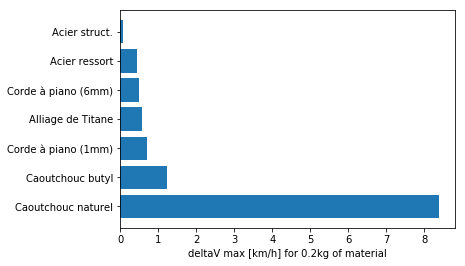

In [665]:
# deltaV ? 
materials = data_mat.keys()
deltaV = []

for mat in materials:
    deltaV.append( deltaV_max( data_mat[ mat ] )  )
    
materials, deltaV = zip( *sorted( [k for k in zip(materials, deltaV)], key = lambda x:x[1], reverse=True ) )

# plot
ind = range( len(deltaV) )

plt.barh( ind, deltaV, tick_label=materials ); 
plt.xlabel('deltaV max [km/h] for %.1fkg of material'%masse_limite);

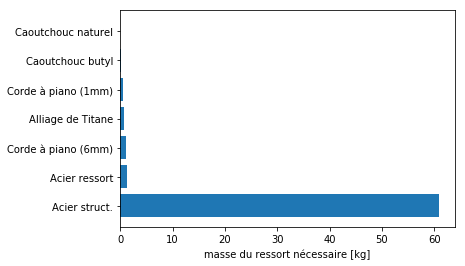

In [666]:
# masse ressort ?
materials = data_mat.keys()
masseRessorts = []

for mat in materials:
    masseRessorts.append( mRessort_max( data_mat[ mat ] )  )
    
materials, masseRessorts = zip( *sorted( [k for k in zip(materials, masseRessorts)], key = lambda x:x[1], reverse=True ) )

# plot
ind = range( len(masseRessorts) )

plt.barh( ind, masseRessorts, tick_label=materials ); 
plt.xlabel('masse du ressort nécessaire [kg]');

In [664]:
for mat, masse in zip(materials, masseRessorts):
    print( '{0:>22} : {1:6.3f} kg     {2:3.1f};  {3:8.4f} GPa;  {4:4.0f} MPa '.format( 
        mat, masse, data_mat[mat]['density'], 1e-9*data_mat[mat]['EYoung'], 1e-6*data_mat[mat]['yield_stress'] ) )

         Acier struct. : 60.938 kg     7.8;  200.0000 GPa;   200 MPa 
         Acier ressort :  1.354 kg     7.8;  160.0000 GPa;  1200 MPa 
   Corde à piano (6mm) :  1.138 kg     7.8;  210.0000 GPa;  1500 MPa 
     Alliage de Titane :  0.798 kg     4.4;  120.0000 GPa;  1020 MPa 
   Corde à piano (1mm) :  0.529 kg     7.8;  210.0000 GPa;  2200 MPa 
      Caoutchouc butyl :  0.177 kg     1.2;    0.0070 GPa;     9 MPa 
    Caoutchouc naturel :  0.004 kg     0.7;    0.0015 GPa;    20 MPa 


# Dimensionement d'un ressort spiral

[Traité de construction horlogère](https://books.google.fr/books?id=EPxUNlKp1JUC&lpg=PA38&dq=ressort%20barillet%20formule&hl=fr&pg=PA31#v=onepage&q&f=false)

formule 2.20 page 31:

$$
M = E\,\frac{h\,e^3}{12\,L}\,\alpha
$$

où  
* $M$ est le moment ($N.m$)
* $\alpha$ est la variation d'angle (en radian)
* $E$ est le module de Young ($N/m^2$)
* $L$ est la longueur du ressort
* $h$ est la largeur de lame
* $e$ est l'épaisseur de la lame

et un peu plus loin, on trouve l'énergie maximal stockée dans le ressort $U_{max}$:
$$
U_{max} = \frac{1}{2} E \frac{h\,e^3}{12\,L}\,\alpha_{max}^2
$$

On trouve d'autre précision [ici](http://www.springsandthings.com/pdf/spiral-torsion-springs.pdf):

La contrainte maximale est typiquement de ~1200 MPa, et est donnée par la formule:
$$
\sigma_{max} = \frac{6}{h e^2} M_{max} = \frac{E\,e}{2\, L} \alpha_{max}
$$
(aussi la formule 2.22)

Une formule permet d'estimer la taille du ressort en fonction de sa longueur:
$$
D = \frac{2\,L}{\pi \,\left( \frac{\sqrt{A^2 - 1.27Le} - A}{2e} - \frac{\alpha}{2\pi} \right) } - A
$$

On peut en déduire le meilleurs compromis entre l'épaisseur du ressort et sa longueur:

pour la limite en contrainte :
$$
e_{lim} = \frac{\sigma_{max}}{E}\frac{2L}{\alpha}
$$

pour la limite en masse ($m_{max}$), $\rho$ est la densité de l'acier:
$$
e_{lim} = \frac{m_{max}}{\rho \, L\, h}
$$

donc 
$$
\frac{m_{max}}{\rho \, L_{opti}\, h}  = \frac{\sigma_{max}}{\alpha}\frac{2L_{opti}}{E}
$$

$$
L_{opti} =  \sqrt{ \frac{\alpha}{2} \, \frac{m_{max}}{\rho \, h} \frac{E}{\sigma_{max}} }
$$

et l'expression de l'épaisseur optimal devient:
$$
e_{opti} = \sqrt{ \frac{2}{\alpha} \, \frac{m_{max}}{\rho \, h} \frac{\sigma_{max}}{E} }
$$

L'energie stockée devient:
$$
U_{opti} = \frac{1}{6} \frac{\sigma_{max}^2}{E}\,\frac{m_{max}}{\rho}
$$

### Valeurs raisonables:

In [705]:
# Energie cinétique du cycliste :
deltaV = 15 *1e3/3600 # m/s
masse = 90 # kg

Ecinetique = 0.5*masse *deltaV**2
print( 'Energie cinétique: %.0f Joule' % Ecinetique )

Energie cinétique: 781 Joule


entre 100 et 800 Joule...

Le cyliste est quand même sensé pédaler aussi

In [706]:
Ntour = 3 # nombre de tour possible
alpha_max = 2*np.pi* Ntour  
E = 220e9 # Pa  - acier à ressort (wikipédia)

In [707]:
rayon = 69e-2 / 2 # m, rayon d'une roue
distance_assistance = rayon*alpha_max
print( "distance de l'assistance: %.1f m" % distance_assistance )

distance de l'assistance: 6.5 m


Typiquement la distance de démarrage... la moitié d'une intersection...

In [708]:
e = 1e-3 # m
h = 15e-3 # m
L = 6 # m

In [709]:
Umax = 0.5*E*h* e**3 /12/L * alpha_max**2  # J

print( 'Energie potentiel max: %.0f Joule' % Umax )

Energie potentiel max: 8 Joule


In [710]:
rho = 7400 # kg/m3
V = e*h*L  # colume du ressort
Mressort = rho*V

print( 'Masse du ressort: %.0f grammes' % (Mressort*1000) )

Masse du ressort: 666 grammes


In [711]:
sigma_max = alpha_max / 2 * e *E /L 

print( 'Contrainte max du ressort: %.0f MPa (vs 1200 MPa)' % (sigma_max*1e-6) )

Contrainte max du ressort: 346 MPa (vs 1200 MPa)


In [712]:
A = 2e-2 # diamètre intérieure
D = 2*L/( ( np.sqrt(A**2 + 1.27*L*e)-A )/2/e - alpha_max/2/np.pi )/np.pi - A

In [713]:
print('diamètre extérieure: %.1f cm ' % (D*100) )

diamètre extérieure: 10.0 cm 


In [714]:
Umax_map = lambda e, L:0.5*E*h* e**3 /12/L * alpha_max**2  # J


sigma_limit = 1200*1e6 # Pa
e_max_sigmaLimit = lambda L: sigma_limit*2*L / alpha_max /E


e_max_masseLimit = lambda L, masse_limit: masse_limit/h/L/rho

delta_V = lambda deltaE : np.sqrt( 2/masse* deltaE  )*3600/1e3  # km/h

In [715]:
masse_limit = 1 # kg
sigma_limit = 1200*1e6 # Pa

U_opti = 1/6 * sigma_limit**2 / E * masse_limit/ rho
e_opti = np.sqrt( masse_limit/rho/h * 2/alpha_max * sigma_limit/E )
L_opti = np.sqrt( masse_limit/rho/h * alpha_max/2 * E / sigma_limit )

In [716]:
L_span = np.linspace( 0.5, 10, 44 )
e_span = 1e-3* np.linspace( 0.1, 5, 56 )

Lxy, exy = np.meshgrid(L_span, e_span)
Umax_xy = Umax_map( exy, Lxy  )

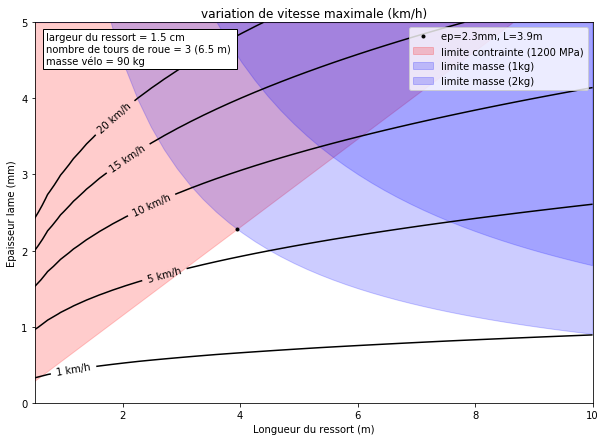

In [717]:
plt.figure(figsize=(10, 7))

# en Joule
#CS = plt.contour( L_span, 1e3*e_span, Umax_xy, colors='k', levels=[50, 100, 200, 400, 800, 1000] )
#plt.clabel(CS, inline=1, fontsize=10, fmt='%.0f J')
#plt.title('Energie maximale stockée (Joule)');

## en km/h
CS = plt.contour( L_span, 1e3*e_span, delta_V(Umax_xy), colors='k', levels=[1, 5, 10, 15, 20] )
plt.clabel(CS, inline=1, fontsize=10, fmt='%.0f km/h')
plt.title('variation de vitesse maximale (km/h)');

plt.xlabel('Longueur du ressort (m)')
plt.ylabel('Epaisseur lame (mm)')


e_upper = np.max(e_span)*1e3
plt.fill_between( L_span, 1e3*e_max_sigmaLimit(L_span), e_upper*np.ones_like(L_span), alpha=0.2, color='r', label='limite contrainte (1200 MPa)' )
plt.fill_between( L_span, 1e3*e_max_masseLimit(L_span, 1),  e_upper*np.ones_like(L_span), alpha=0.2, color='b', label='limite masse (1kg)' )
plt.fill_between( L_span, 1e3*e_max_masseLimit(L_span, 2),  e_upper*np.ones_like(L_span), alpha=0.2, color='b', label='limite masse (2kg)' )

plt.plot( L_opti, e_opti*1e3, '.k', label='ep=%.1fmm, L=%.1fm'%((e_opti*1e3), L_opti)  )

plt.legend();
plt.ylim( [0, e_upper ] );

mytext = 'largeur du ressort = %.1f cm \n' % (1e2*h)
mytext += 'nombre de tours de roue = %.0f (%.1f m) \n' % (Ntour, distance_assistance)
mytext += 'masse vélo = %.0f kg ' % (masse)

ax = plt.gca()
ax.text(0.02, 0.89, mytext,transform=ax.transAxes, bbox=dict(facecolor='w',edgecolor='black',boxstyle='square'))

